In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob


In [12]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from google.colab import files
uploaded = files.upload()


Saving twitter_validation.csv to twitter_validation (1).csv


In [14]:
from google.colab import files
uploaded = files.upload()


Saving twitter_training.csv to twitter_training (1).csv


In [36]:
col_names = ['id', 'entity', 'sentiment', 'content']


train_data = pd.read_csv('twitter_training.csv', names=col_names, header=None)
valid_data = pd.read_csv('twitter_validation.csv', names=col_names, header=None)

In [37]:
train_data.head()


,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [38]:
train_data.head()


,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [39]:
valid_data.head()
valid_data.shape


(1000, 4)

In [40]:
print(train_data.columns)


Index(['id', 'entity', 'sentiment', 'content'], dtype='object')


In [41]:
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [42]:
train_data.isnull().sum()

,0
id,0
entity,0
sentiment,0
content,686


In [43]:
train_data.dropna(subset=['content'], inplace=True)

In [24]:
train_data.isnull().sum()

,0
id,0
entity,0
sentiment,0
content,686


In [44]:
train_data.drop_duplicates(subset=['content'], inplace=True)

In [26]:
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 102
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4 non-null      int64 
 1   entity     4 non-null      object
 2   sentiment  4 non-null      object
 3   content    4 non-null      object
dtypes: int64(1), object(3)
memory usage: 160.0+ bytes


(4, 4)

In [45]:
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [46]:
def clean_text(text):
    if pd.isnull(text):
        return ""

    # delete links
    text = re.sub(r'https?://\S+', '', text)

    # delete menshion and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

   # Remove special symbols and characters
    text = re.sub(r'[^A-Za-z0-9\s]', ' ', text)

    # conv to LowerCase
    text = text.lower()

    # Tokenization
    tokens = tokenizer.tokenize(text)

    # deletl stopwords
    tokens = [t for t in tokens if t not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return " ".join(tokens)


In [47]:
train_data['clean_text'] = train_data['content'].apply(clean_text)

In [31]:
train_data['clean_length'] = train_data['clean_text'].apply(len)
print(train_data['clean_length'].describe())

count     4.000000
mean      8.250000
std       1.258306
min       7.000000
25%       7.750000
50%       8.000000
75%       8.500000
max      10.000000
Name: clean_length, dtype: float64


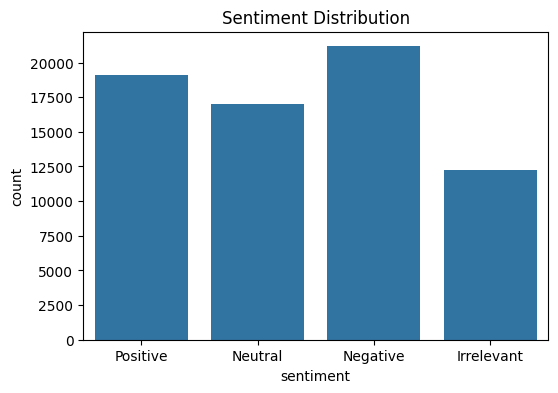

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [49]:
train_data.to_csv("clean_twitter_data.csv", index=False)
print("Saved")

Saved


In [51]:

def extract_mentions(text):
    if pd.isnull(text):
        return []
    return re.findall(r'@\w+', text)



def extract_hashtags(text):
    if pd.isnull(text):
        return []
    return re.findall(r'#\w+', text)



train_data['mentions'] = train_data['content'].apply(extract_mentions)
train_data['hashtags'] = train_data['content'].apply(extract_hashtags)


train_data['clean_text'].to_frame()

#train_data[train_data['text'].str.contains('@') | train_data['text'].str.contains('#')][['text','mentions','hashtags']].head()




,clean_text
0,im getting borderland murder
1,coming border kill
2,im getting borderland kill
3,im coming borderland murder
4,im getting borderland 2 murder
...,...
74677,realized window partition mac like 6 year behi...
74678,realized mac window partition 6 year behind nv...
74679,realized window partition mac 6 year behind nv...
74680,realized window partition mac like 6 year behi...


In [52]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), sublinear_tf=True)


X_tfidf = tfidf.fit_transform(train_data['clean_text'])

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (69491, 5000)


In [55]:
le = LabelEncoder()
y = le.fit_transform(train_data['sentiment'])

print("Classes:", le.classes_)
print("y shape:", y.shape)

Classes: ['Irrelevant' 'Negative' 'Neutral' 'Positive']
y shape: (69491,)


# Data Analysis

In [56]:
# Check for missing values
train_data.isnull().sum()
valid_data.isnull().sum()

,0
id,0
entity,0
sentiment,0
content,0


In [57]:
# Checking the distribution of sentiment labels
train_sentiment_distribution = train_data.iloc[:, 2].value_counts()
valid_sentiment_distribution = valid_data.iloc[:, 2].value_counts()
train_sentiment_distribution,valid_sentiment_distribution

(sentiment
 Negative      21166
 Positive      19067
 Neutral       17042
 Irrelevant    12216
 Name: count, dtype: int64,
 sentiment
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    172
 Name: count, dtype: int64)

In [58]:
train_data.iloc[:, 1].nunique()


32

In [60]:
train_data_cleaned = train_data.drop_duplicates(subset=['id', 'entity', 'sentiment', 'content'])

In [61]:
# Drop rows with missing tweet/message values
train_data_cleaned.dropna(subset=[train_data.columns[3]])


,id,entity,sentiment,content,clean_text,mentions,hashtags
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder,[],[]
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,[],[]
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill,[],[]
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder,[],[]
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland 2 murder,[],[]
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like 6 year behi...,[],[]
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition 6 year behind nv...,[],[]
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac 6 year behind nv...,[],[]
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like 6 year behi...,[],[]


In [64]:
 #Verify the cleaning
remaining_duplicates_train = train_data_cleaned.duplicated(subset=['id', 'entity', 'sentiment', 'content']).sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(np.int64(0),
 id            0
 entity        0
 sentiment     0
 content       0
 clean_text    0
 mentions      0
 hashtags      0
 dtype: int64)

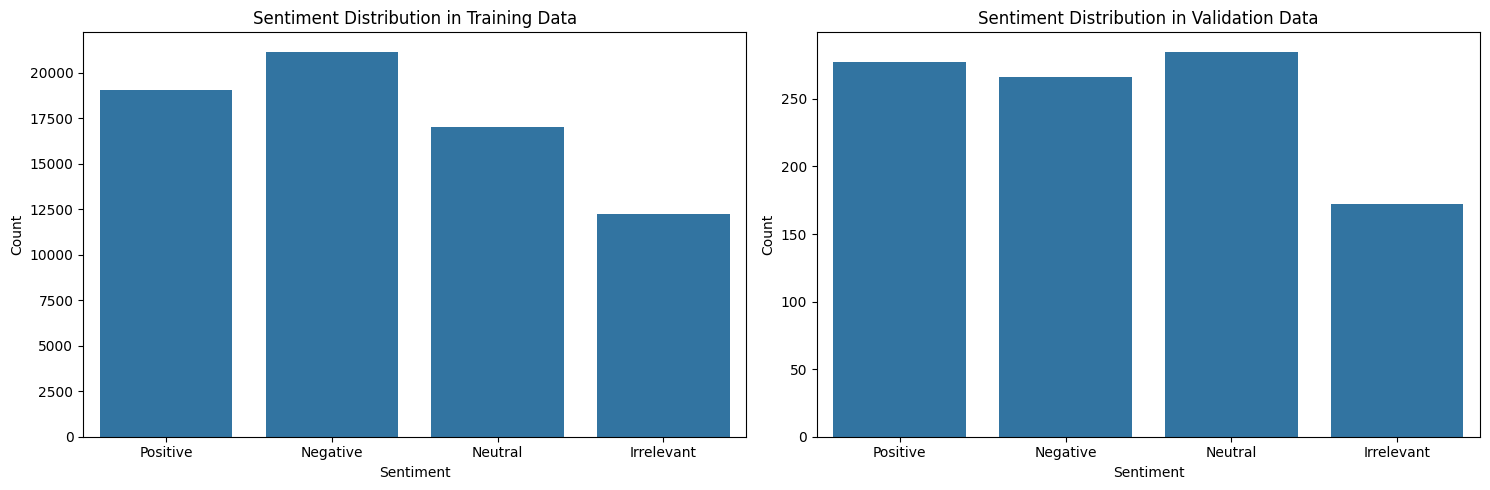

In [65]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot sentiment distribution for training data
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=valid_data, x=valid_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

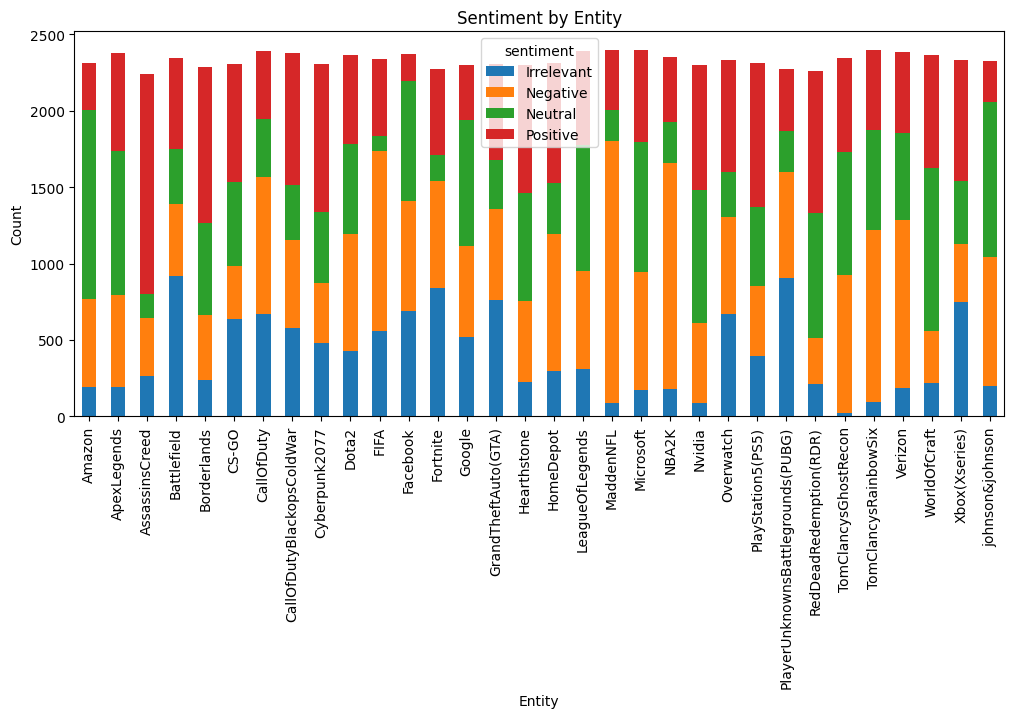

In [78]:
plt.figure(figsize=(10,5))
train_data.groupby(["entity", "sentiment"]).size().unstack().plot(kind="bar", stacked=True, figsize=(12,5))
plt.title("Sentiment by Entity")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.show()


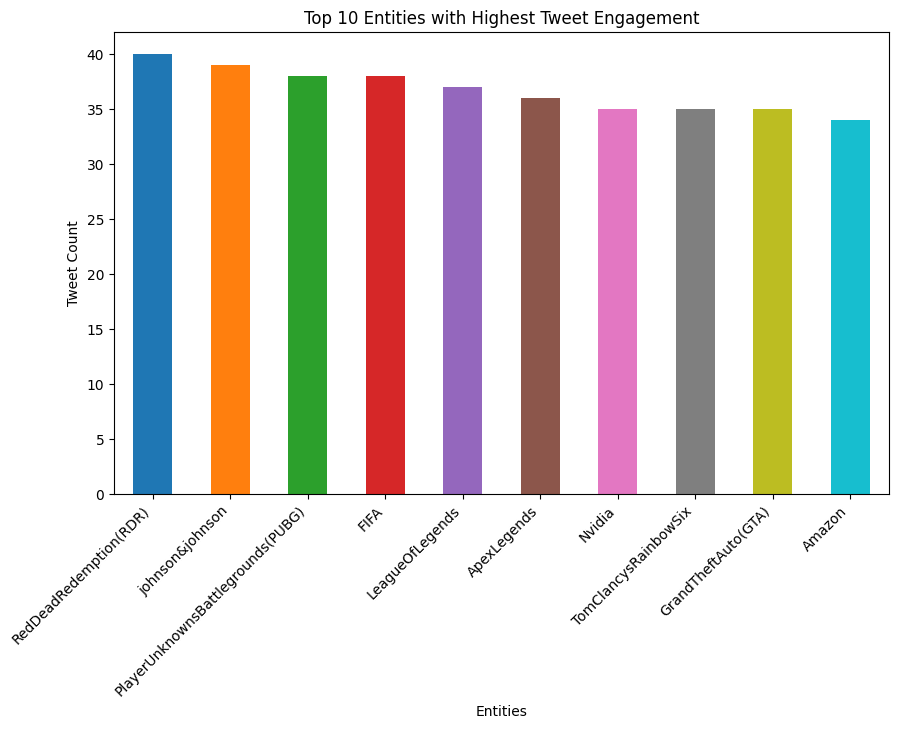

In [66]:
#Bar Chart representation of top 10 most engaged entities on tweets
# Count the occurrences of each category
entity_counts = valid_data['entity'].value_counts()

# Select the top 10 categories
top_10_entity = entity_counts.head(10)

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot a bar graph for the top 10 categories with colors
plt.figure(figsize=(10, 6))
top_10_entity.plot(kind='bar', color=colors)

# Remove the annotate part to not show values on top of each bar

plt.xlabel("Entities")
plt.ylabel('Tweet Count')
plt.title('Top 10 Entities with Highest Tweet Engagement')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

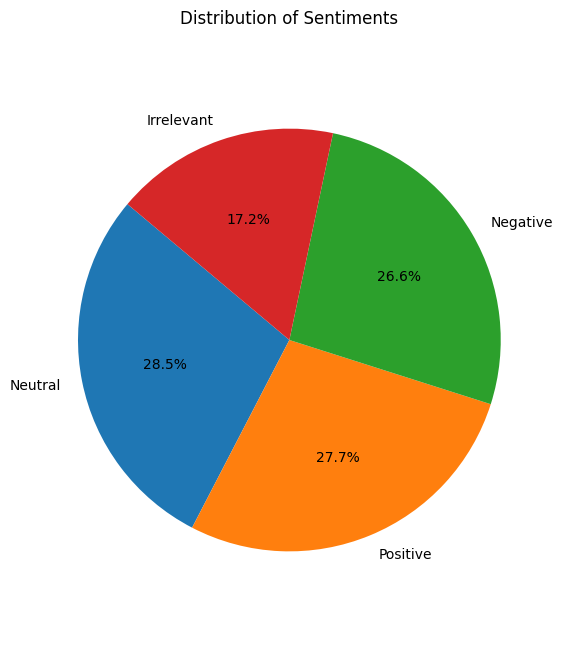

In [67]:
category_counts = valid_data['sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Distribution of Sentiments')
plt.show()

/tmp/ipython-input-1099678249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')


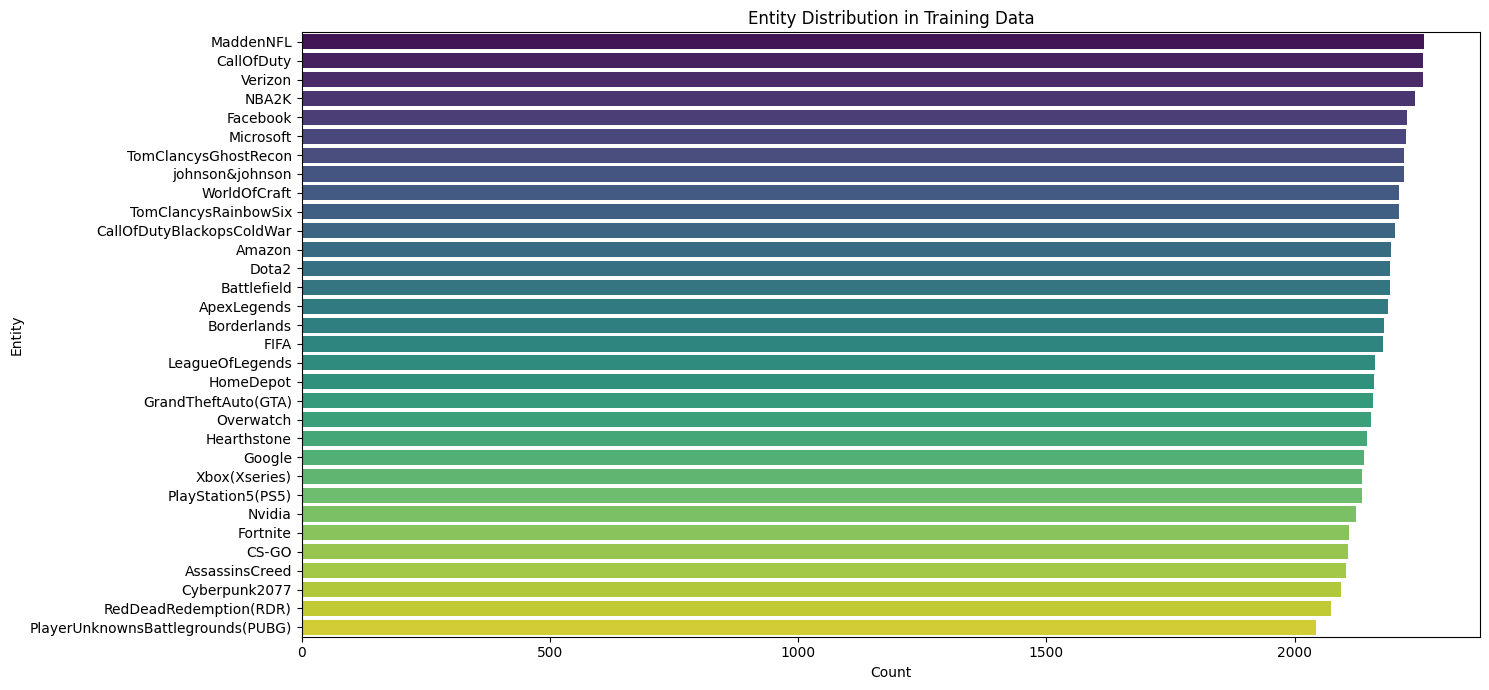

In [68]:
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

In [97]:
top_entities = train_data['entity'].value_counts().nlargest(10).index
train_data_top = train_data[train_data['entity'].isin(top_entities)]

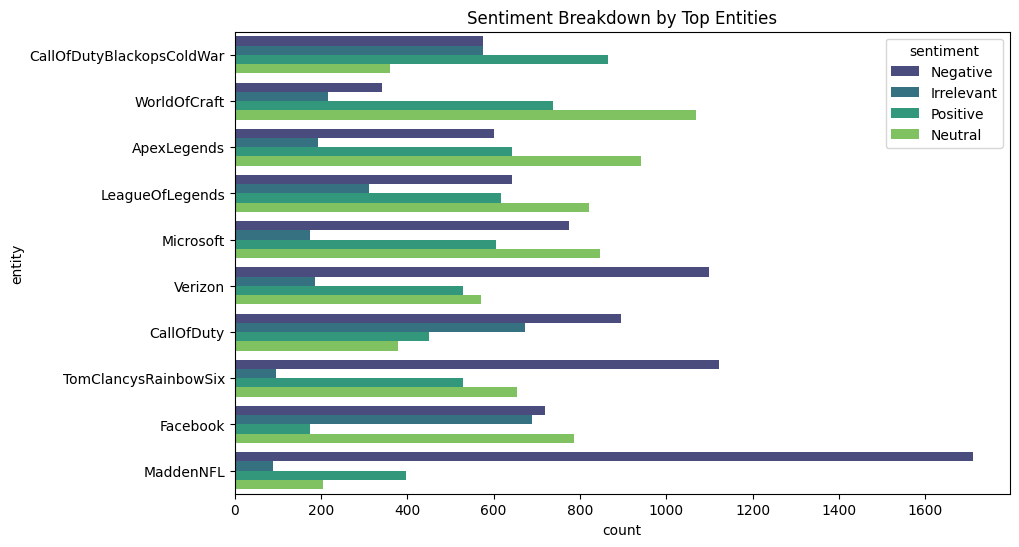

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(y='entity', hue='sentiment', data=train_data_top, palette='viridis')
plt.title('Sentiment Breakdown by Top Entities')
plt.show()

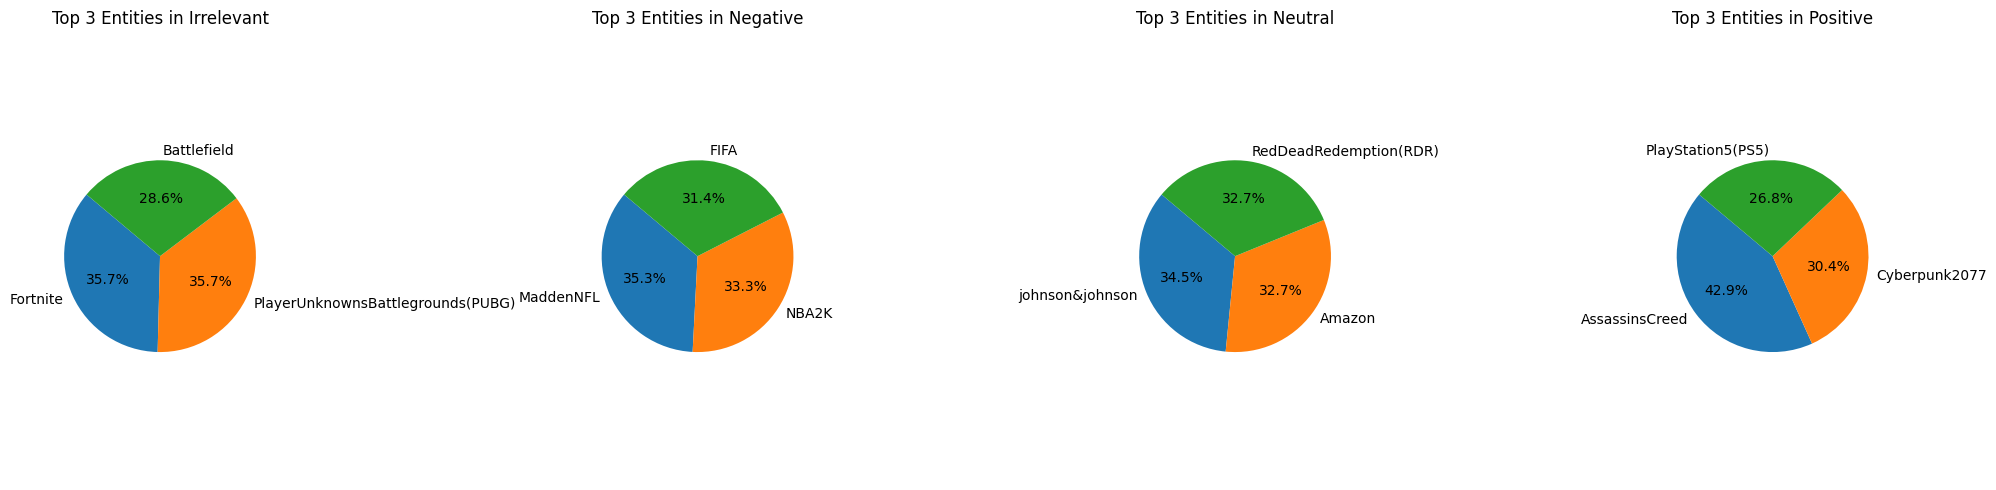

In [69]:
# Pie chart representation of the top three entities in each sentiment category
# Group the data by 'tweet_category' and 'entity' and count occurrences
category_entity_counts = valid_data.groupby(['sentiment', 'entity']).size().unstack(fill_value=0)

# Create a list to store the top 3 entities for each category
top_three_entities = []

# Iterate through each category
for category in category_entity_counts.index:
    top_entities = category_entity_counts.loc[category].nlargest(3)
    top_three_entities.append(top_entities)

# Determine the number of subplots based on the number of categories
num_categories = len(category_entity_counts.index)

# Create subplots for each category
plt.figure(figsize=(5 * num_categories, 5))
for i, (category, top_entities) in enumerate(zip(category_entity_counts.index, top_three_entities), start=1):
    plt.subplot(1, num_categories, i)
    plt.pie(top_entities, labels=top_entities.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 3 Entities in {category}')

plt.tight_layout()
plt.show()

In [70]:
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].fillna('').apply(len)
valid_data['message_length'] = valid_data[valid_data.columns[3]].fillna('').apply(len)


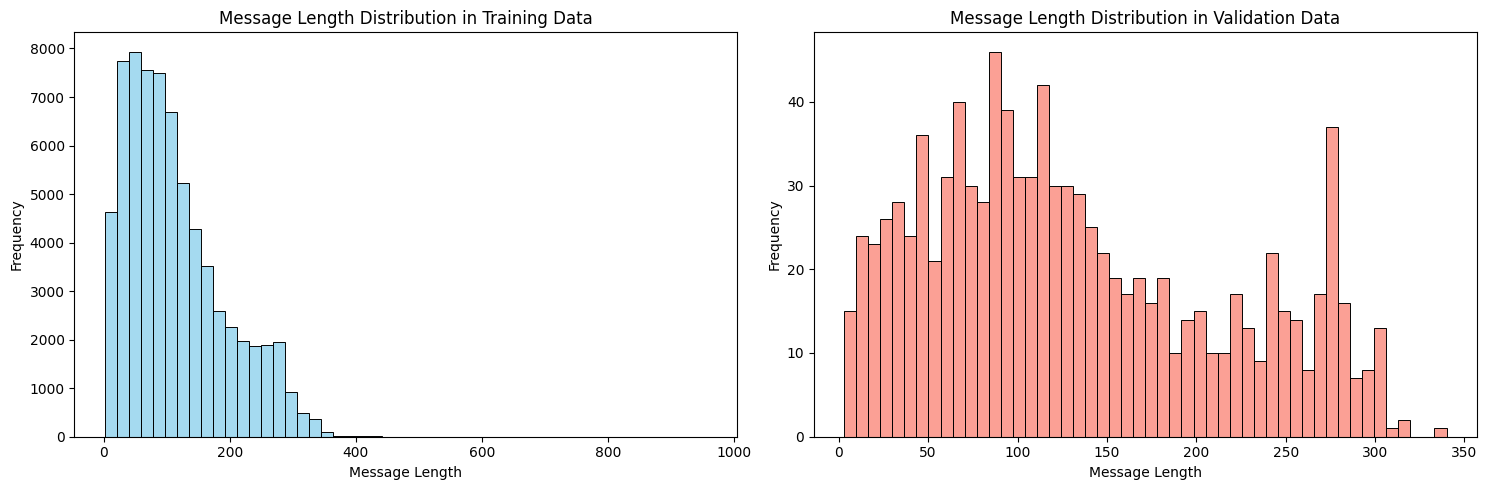

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution for training data
sns.histplot(train_data_cleaned['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(valid_data['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2792879266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
/tmp/ipython-input-2792879266.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=valid_data, x=valid_data.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


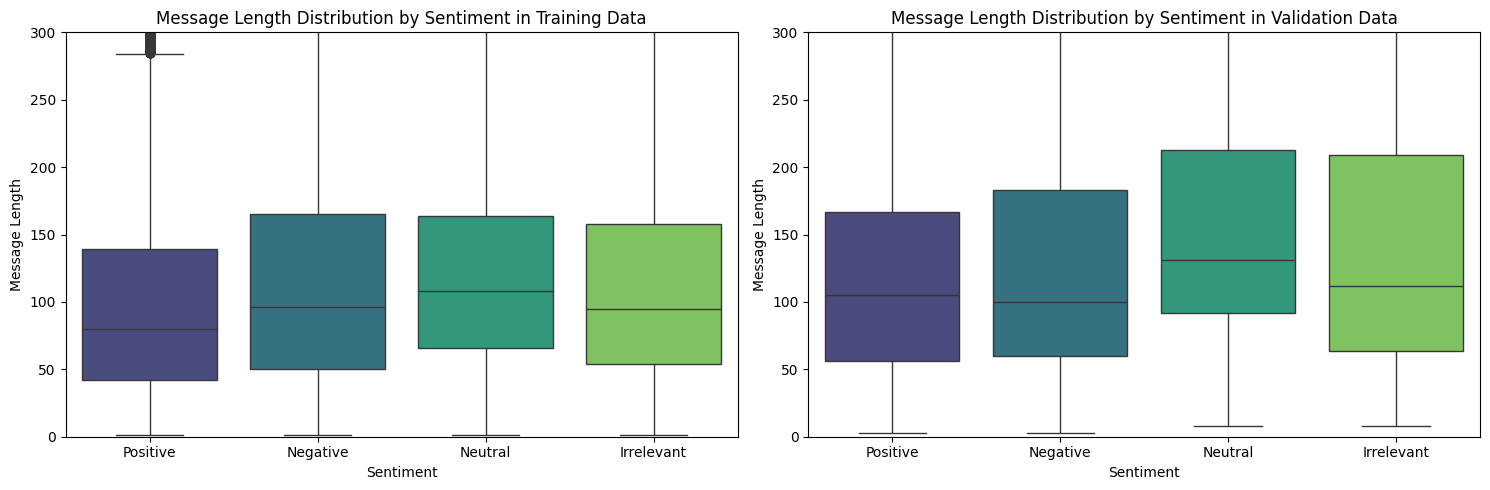

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0, 300)

# Plot message length distribution by sentiment for validation data
sns.boxplot(data=valid_data, x=valid_data.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0, 300)

plt.tight_layout()
plt.show()

In [74]:
col_names = ['id', 'entity', 'sentiment', 'content']

train_data = pd.read_csv('twitter_training.csv', names=col_names, header=None)
valid_data = pd.read_csv('twitter_validation.csv', names=col_names, header=None)

In [81]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

# Replace "tweet" with the actual column name, e.g., "text"
train_data["clean_tweet"] = train_data["content"].astype(str).apply(clean_text)

In [84]:
from collections import Counter
def get_top_words(sentiment, n=20):
    text = " ".join(train_data[train_data["sentiment"] == sentiment]["clean_tweet"])
    words = text.split()
    counter = Counter(words)
    return counter.most_common(n)

In [85]:
print("Top 20 words in Positive tweets:", get_top_words("Positive"))
print("Top 20 words in Negative tweets:", get_top_words("Negative"))
print("Top 20 words in Neutral tweets:", get_top_words("Neutral"))
print("Top 20 words in Irrelevant tweets:", get_top_words("Irrelevant"))

Top 20 words in Positive tweets: [('the', 11804), ('i', 9115), ('to', 7665), ('and', 6909), ('a', 5935), ('of', 5113), ('is', 4500), ('for', 4379), ('this', 4255), ('it', 4015), ('in', 3801), ('my', 3301), ('on', 2802), ('so', 2750), ('you', 2549), ('that', 2468), ('game', 2274), ('with', 2213), ('be', 1821), ('me', 1785)]
Top 20 words in Negative tweets: [('the', 14017), ('i', 10101), ('to', 9082), ('and', 8630), ('a', 7490), ('is', 6823), ('of', 5746), ('this', 4909), ('it', 4782), ('in', 4781), ('you', 4454), ('for', 4260), ('my', 4143), ('on', 3806), ('that', 3784), ('game', 3768), ('not', 2822), ('with', 2811), ('so', 2447), ('have', 2428)]
Top 20 words in Neutral tweets: [('the', 10630), ('to', 7167), ('and', 6359), ('a', 5969), ('i', 5560), ('of', 4939), ('for', 3997), ('in', 3993), ('is', 3362), ('on', 3215), ('it', 2843), ('this', 2832), ('my', 2494), ('you', 2444), ('with', 2247), ('that', 2101), ('johnson', 1772), ('just', 1662), ('at', 1596), ('have', 1471)]
Top 20 words in

In [86]:
from nltk import ngrams

def get_bigrams(sentiment):
    text = " ".join(train_data[train_data["sentiment"] == sentiment]["clean_tweet"])
    tokens = text.split()
    bigrams = list(ngrams(tokens, 2))
    counter = Counter(bigrams)
    return counter.most_common(20)

print("Top bigrams (Positive):", get_bigrams("Positive"))
print("Top bigrams (Negative):", get_bigrams("Negative"))

Top bigrams (Positive): [(('i', 'love'), 812), (('of', 'the'), 809), (('in', 'the'), 716), (('this', 'is'), 655), (('the', 'best'), 644), (('for', 'the'), 615), (('red', 'dead'), 599), (('and', 'i'), 597), (('thank', 'you'), 553), (('assassins', 'creed'), 537), (('cant', 'wait'), 516), (('dead', 'redemption'), 501), (('the', 'game'), 478), (('on', 'the'), 453), (('to', 'be'), 430), (('to', 'play'), 419), (('i', 'am'), 414), (('the', 'new'), 396), (('to', 'the'), 393), (('so', 'much'), 380)]
Top bigrams (Negative): [(('the', 'game'), 885), (('in', 'the'), 876), (('of', 'the'), 750), (('this', 'is'), 746), (('and', 'i'), 654), (('i', 'have'), 574), (('i', 'cant'), 524), (('is', 'a'), 504), (('on', 'the'), 469), (('for', 'the'), 467), (('to', 'the'), 418), (('when', 'i'), 409), (('home', 'depot'), 406), (('this', 'game'), 401), (('i', 'am'), 395), (('to', 'be'), 382), (('to', 'play'), 371), (('to', 'get'), 355), (('with', 'the'), 350), (('is', 'the'), 347)]


In [95]:
def extract_mentions(text):
    return re.findall(r"@\w+", text)

train_data["mentions"] = train_data["content"].apply(lambda x: extract_mentions(str(x)))

# Flatten list
all_mentions = [m for sublist in train_data["mentions"] for m in sublist]

mention_counts = Counter(all_mentions)
print("Top 20 mentioned users:", mention_counts.most_common(20))

Top 20 mentioned users: [('@EAMaddenNFL', 831), ('@Rainbow6Game', 731), ('@NBA2K', 705), ('@GhostRecon', 468), ('@PlayApex', 406), ('@CallofDuty', 339), ('@Verizon', 260), ('@YouTube', 221), ('@Ubisoft', 220), ('@verizon', 215), ('@FortniteGame', 194), ('@PlayHearthstone', 186), ('@HomeDepot', 173), ('@Borderlands', 171), ('@UbisoftSupport', 171), ('@Ronnie2K', 167), ('@NBA2K_MyTEAM', 152), ('@nvidia', 150), ('@DOTA2', 147), ('@LeagueOfLegends', 127)]


/tmp/ipython-input-701390687.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='Greens_d')


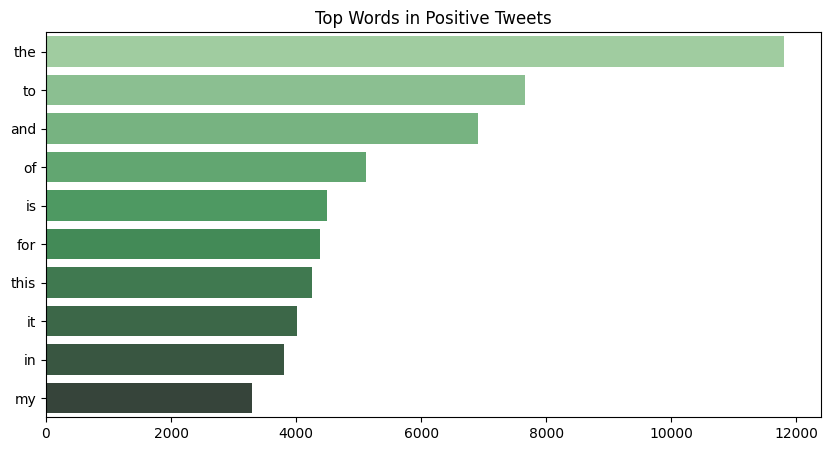

/tmp/ipython-input-701390687.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='Reds_d')


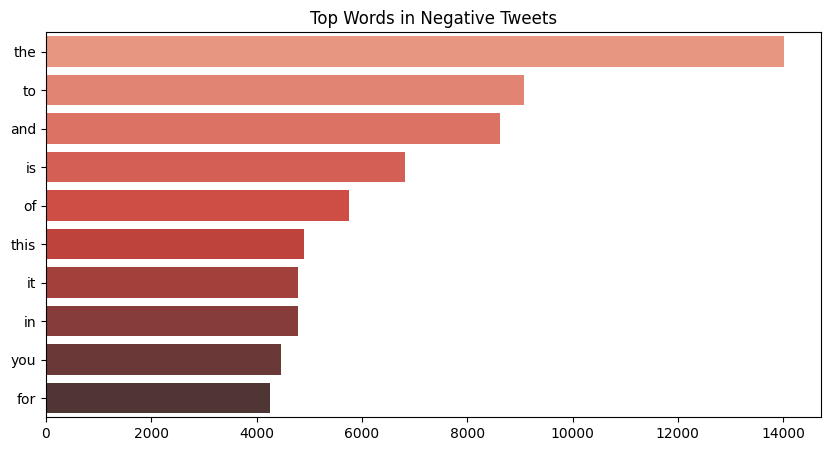

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(corpus, n=10):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

pos_words = get_top_words(train_data[train_data['sentiment']=='Positive']['clean_tweet'])
words, freqs = zip(*pos_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(freqs), y=list(words), palette='Greens_d')
plt.title('Top Words in Positive Tweets')
plt.show()

neg_words = get_top_words(train_data[train_data['sentiment']=='Negative']['clean_tweet'])
words, freqs = zip(*neg_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(freqs), y=list(words), palette='Reds_d')
plt.title('Top Words in Negative Tweets')
plt.show()

In [75]:
# Define a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0


In [76]:
# Perform sentiment analysis
train_data['Polarity'] = train_data['content'].apply(analyze_sentiment)

# Categorize sentiment
train_data['Sentiment_Label'] = train_data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [87]:
# Perform sentiment analysis
valid_data['Polarity'] = valid_data['content'].apply(analyze_sentiment)

# Categorize sentiment
valid_data['Sentiment_Label'] = valid_data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')


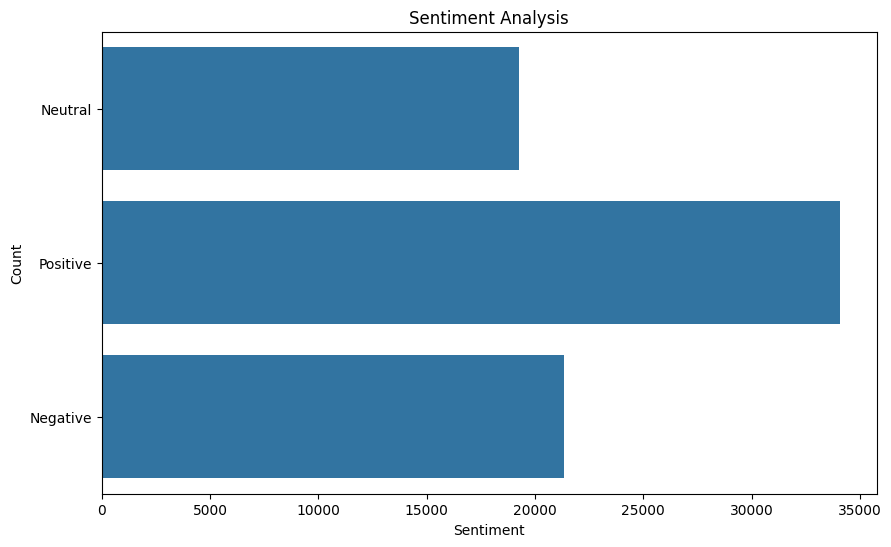

In [88]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(train_data['Sentiment_Label'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1500x800 with 0 Axes>

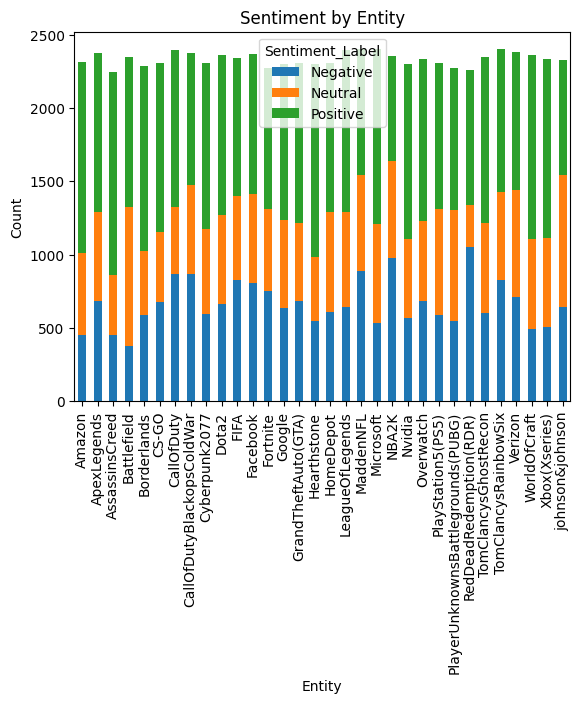

In [89]:
# Analyze sentiment by topic
plt.figure(figsize=(15,8))
sentiment_by_topic = train_data.groupby(['entity', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

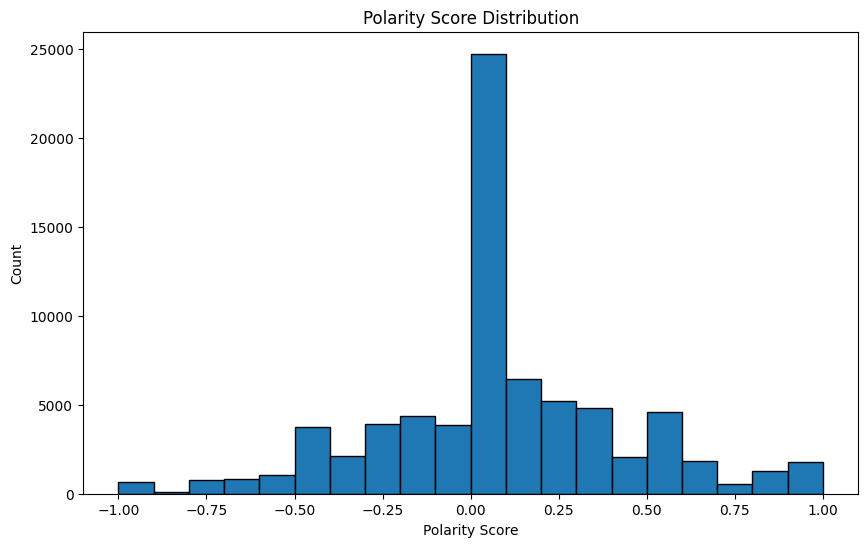

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

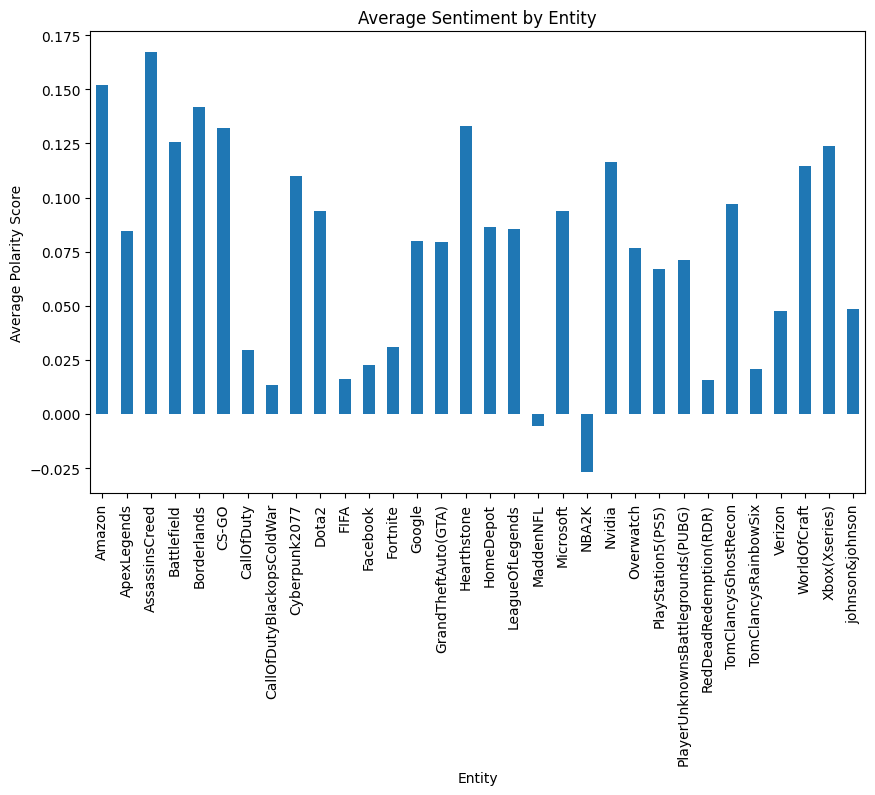

In [91]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = train_data.groupby('entity')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Average Polarity Score')
plt.show()



In [109]:
if "date" in train_data.columns:
    train_data["date"] = pd.to_datetime(train_data["date"], errors="ignore")
    daily_sentiment = df.groupby([train_data["date"].train_data.date, "sentiment"]).size().unstack()
    daily_sentiment.plot(figsize=(12,6))
    plt.title("Sentiment Trend Over Time")
    plt.show()

In [111]:
if "location" in train_data.columns:
    print("Top 20 Locations:",train_data ["location"].value_counts().head(20))